In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
math = pd.read_csv("C:/Users/Erkut/Desktop/Güncel Python Projeleri/student-mat.csv" , sep = ";")
df = math.copy()
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

# df.shape

In [4]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [5]:
df.describe().T
#kategorik ve eksik gözlemleri dışarıda bırakır.

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


In [76]:
df.isnull().values.any()


False

In [7]:
kat_df = df.select_dtypes(include = ["object"])

In [8]:
kat_df.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


In [9]:
num_df = df.select_dtypes(include = ["float64", "int64"])
num_df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10


### KATEGORİK DEĞİŞKENLERE GÖRE SÜTUN GRAFİĞİ ÇAPRAZLAMALARI

In [10]:
import seaborn as sns

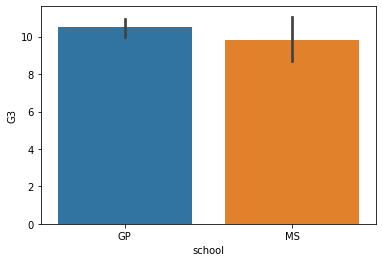

In [11]:
sns.barplot(x = "school", y = "G3", data = df);
#Gabriel Pereira'da okuyanlar Mousinho da Silveira'da okuyanlardan daha başarılı

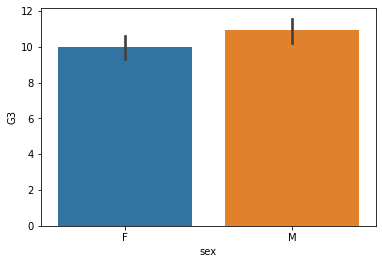

In [12]:
sns.barplot(x = "sex", y = "G3", data = df);
#erkek öğrenciler kadın öğrencilere göre daha başarılı

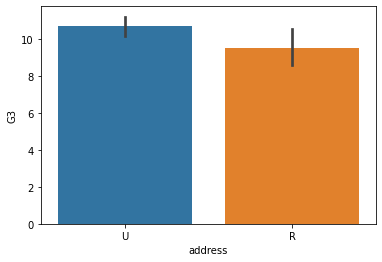

In [13]:
sns.barplot(x = "address", y = "G3", data = df);
#kentte yaşayanlar kırsal bölgede yaşayanlardan daha başarılı

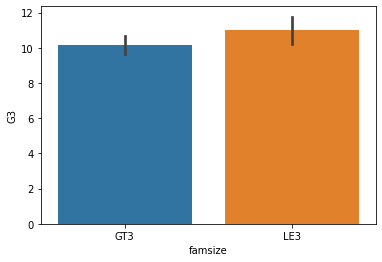

In [14]:
sns.barplot(x = "famsize", y = "G3", data = df);
# 3 ya da daha az kişilik ailelerde yaşayanlar diğer durumlara göre daha başarılı

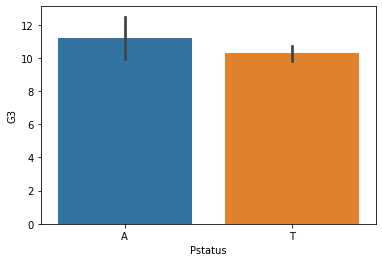

In [15]:
sns.barplot(x = "Pstatus", y = "G3", data = df);
#Aileden ayrı yaşayanlar, birlikte yaşayanlara göre daha başarılı

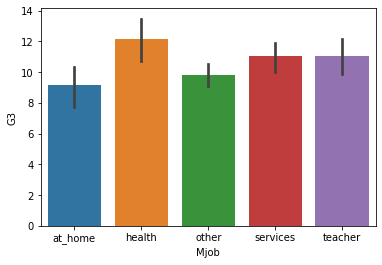

In [16]:
sns.barplot(x = "Mjob", y = "G3", data = df);
#annesi sağlık sektöründe çalışanlar diğer öğrencilere göre daha başarılı

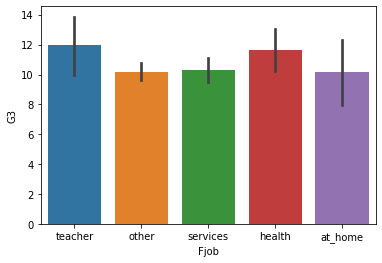

In [17]:
sns.barplot(x = "Fjob", y = "G3", data = df);
#babası öğretmen olanların diğerlerinden daha başarılı olduğu görülebilir. Fakat sağlık sektörü de belirli derecede baskın

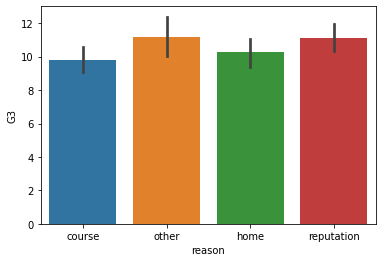

In [18]:
sns.barplot(x = "reason", y = "G3", data = df);
#okulu seçme nedenleri diğer sebepler ve okulun ismi seçenekleri baskın durumda.

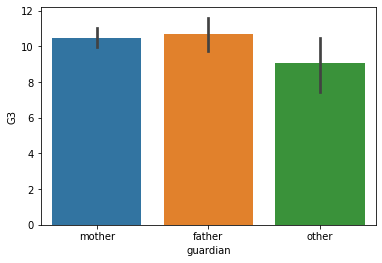

In [19]:
sns.barplot(x = "guardian", y = "G3", data = df);
#öğrencinin temsilcisi anne ve baba, baba olanların göreceli olarak daha başarılı old görülmüş.

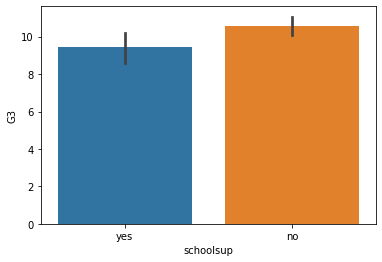

In [20]:
sns.barplot(x = "schoolsup", y = "G3", data = df);
#ekstra okula destek alanların daha başarısız olduğu görülmüş

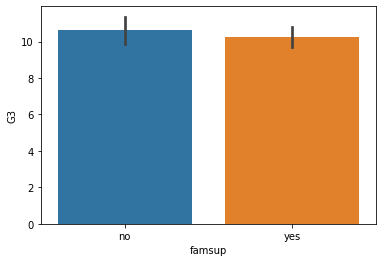

In [21]:
sns.barplot(x = "famsup", y = "G3", data = df);
#aile desteği almayanlar daha başarılı çıkmıştır

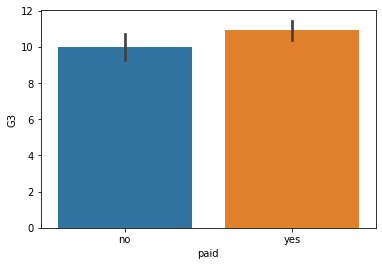

In [22]:
sns.barplot(x = "paid", y = "G3", data = df);
#etüt alanlar daha başarılı çıkmıştır. 

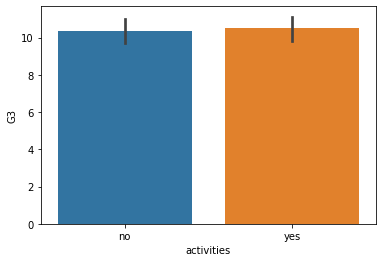

In [23]:
sns.barplot(x = "activities", y = "G3", data = df);
#aktiviteye katılmanın net bir etkisi olduğu söylenemez.

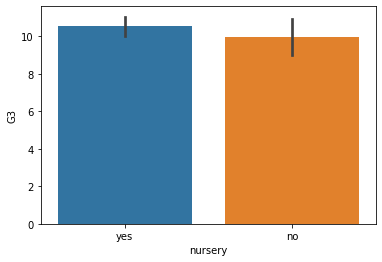

In [24]:
sns.barplot(x = "nursery", y = "G3", data = df);
#net bir etkisi olduğu söylenemez

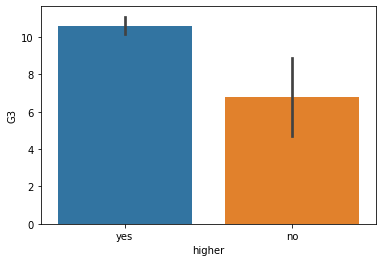

In [25]:
sns.barplot(x = "higher", y = "G3", data = df);
#lise eğitiminden sonra üniversite okumak isteyenlerin başarısı daha yüksektir.

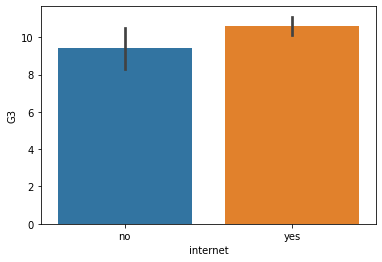

In [26]:
sns.barplot(x = "internet", y = "G3", data = df);
#evinde internete erişimi olan öğrencilerin başarısı daha yüksektir.

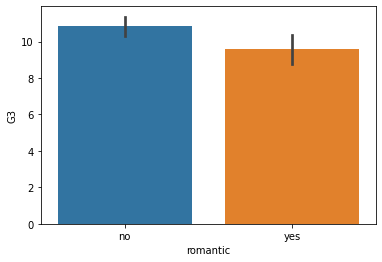

In [27]:
sns.barplot(x = "romantic", y = "G3", data = df);
#romantik ilişkileri olmayan öğrenciler daha başarılıdır.

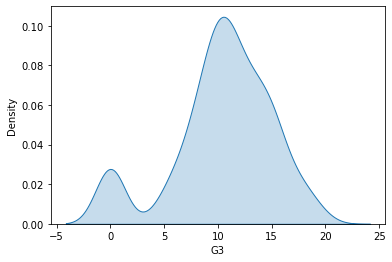

In [28]:
sns.kdeplot(df.G3, shade = True);
#Final notlarının dağılımı
#iki tepeli dağılımlar için içerisinde başka bilgiler barındırdığı söylenebilri.

C:\Users\Erkut\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Erkut\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


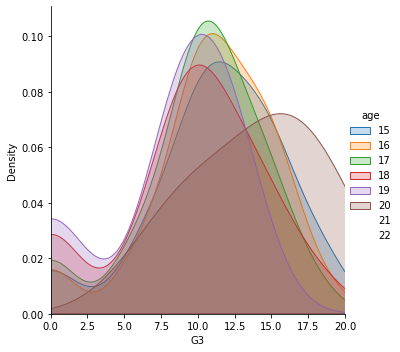

In [29]:
(sns
 .FacetGrid(df,
            hue = "age",
            height = 5,
            xlim = (0,20))
 .map(sns.kdeplot, "G3", shade = True)
 .add_legend()
);

            

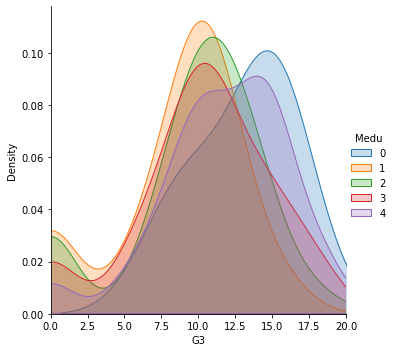

In [30]:
(sns
 .FacetGrid(df,
            hue = "Medu",
            height = 5,
            xlim = (0,20))
 .map(sns.kdeplot, "G3", shade = True)
 .add_legend()
);


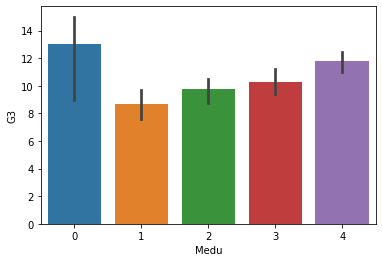

In [31]:
sns.barplot(x = "Medu", y = "G3", data = df);

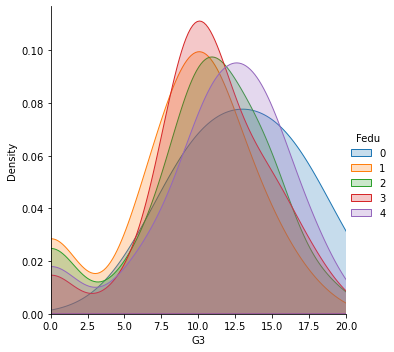

In [32]:
(sns
 .FacetGrid(df,
            hue = "Fedu",
            height = 5,
            xlim = (0,20))
 .map(sns.kdeplot, "G3", shade = True)
 .add_legend()
);

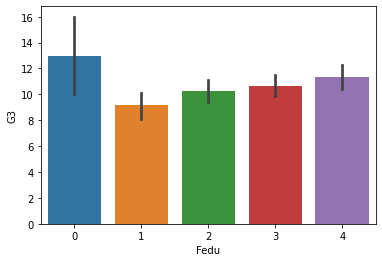

In [33]:
sns.barplot(x = "Fedu", y = "G3", data = df);

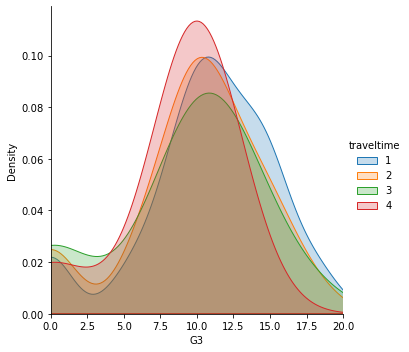

In [34]:
(sns
 .FacetGrid(df,
            hue = "traveltime",
            height = 5,
            xlim = (0,20))
 .map(sns.kdeplot, "G3", shade = True)
 .add_legend()
);

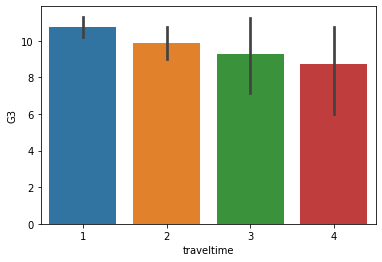

In [35]:
sns.barplot(x = "traveltime", y = "G3", data = df);

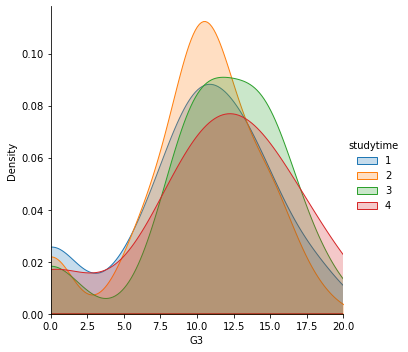

In [36]:
(sns
 .FacetGrid(df,
            hue = "studytime",
            height = 5,
            xlim = (0,20))
 .map(sns.kdeplot, "G3", shade = True)
 .add_legend()
);

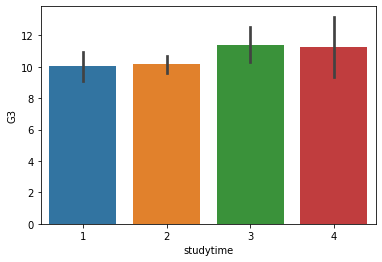

In [37]:
sns.barplot(x = "studytime", y = "G3", data = df);

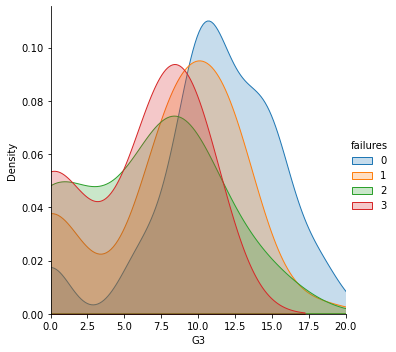

In [38]:
(sns
 .FacetGrid(df,
            hue = "failures",
            height = 5,
            xlim = (0,20))
 .map(sns.kdeplot, "G3", shade = True)
 .add_legend()
);

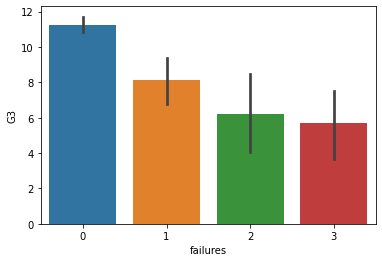

In [39]:
sns.barplot(x = "failures", y = "G3", data = df);

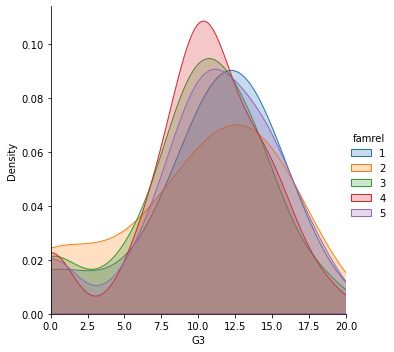

In [40]:
(sns
 .FacetGrid(df,
            hue = "famrel",
            height = 5,
            xlim = (0,20))
 .map(sns.kdeplot, "G3", shade = True)
 .add_legend()
);

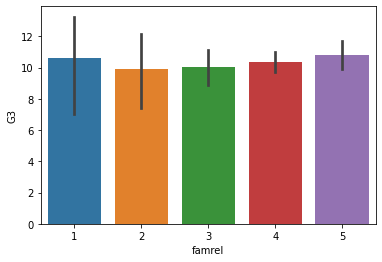

In [41]:
sns.barplot(x = "famrel", y = "G3", data = df);

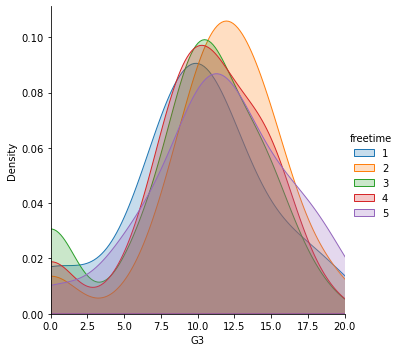

In [42]:
(sns
 .FacetGrid(df,
            hue = "freetime",
            height = 5,
            xlim = (0,20))
 .map(sns.kdeplot, "G3", shade = True)
 .add_legend()
);


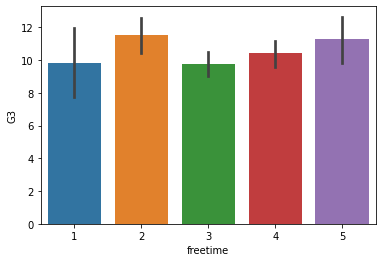

In [43]:
sns.barplot(x = "freetime", y = "G3", data = df);

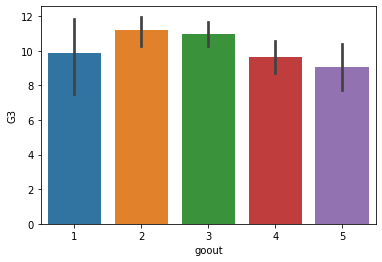

In [44]:
sns.barplot(x = "goout", y = "G3", data = df);

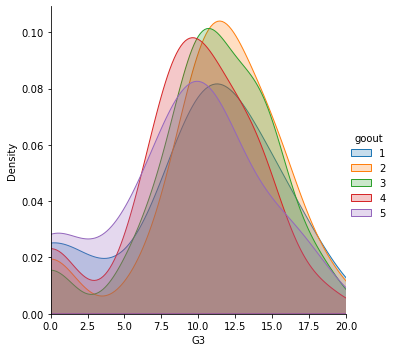

In [45]:
(sns
 .FacetGrid(df,
            hue = "goout",
            height = 5,
            xlim = (0,20))
 .map(sns.kdeplot, "G3", shade = True)
 .add_legend()
);


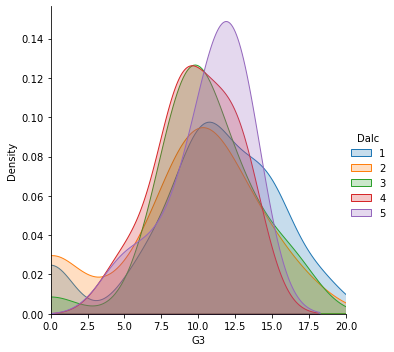

In [46]:
(sns
 .FacetGrid(df,
            hue = "Dalc",
            height = 5,
            xlim = (0,20))
 .map(sns.kdeplot, "G3", shade = True)
 .add_legend()
);


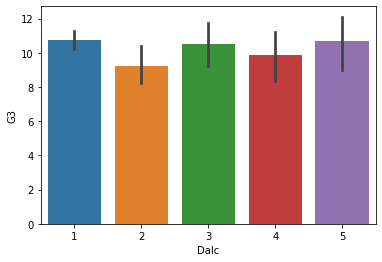

In [47]:
sns.barplot(x = "Dalc", y = "G3", data = df);

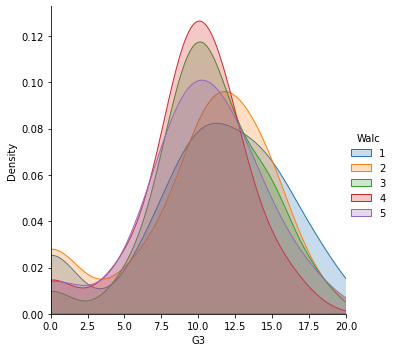

In [48]:
(sns
 .FacetGrid(df,
            hue = "Walc",
            height = 5,
            xlim = (0,20))
 .map(sns.kdeplot, "G3", shade = True)
 .add_legend()
);


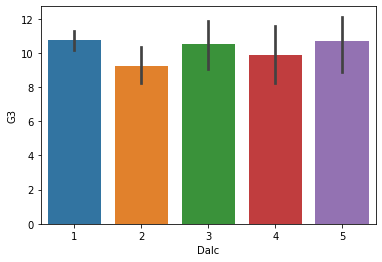

In [49]:
sns.barplot(x = "Dalc", y = "G3", data = df);

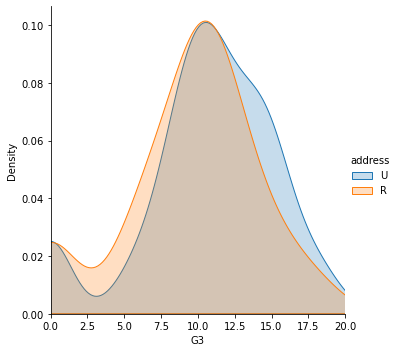

In [50]:
(sns
 .FacetGrid(df,
            hue = "address",
            height = 5,
            xlim = (0,20))
 .map(sns.kdeplot, "G3", shade = True)
 .add_legend()
);

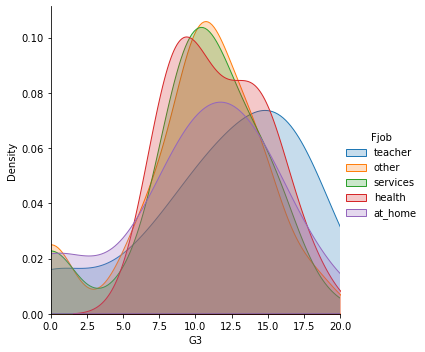

In [51]:
(sns
 .FacetGrid(df,
            hue = "Fjob",
            height = 5,
            xlim = (0,20))
 .map(sns.kdeplot, "G3", shade = True)
 .add_legend()
);

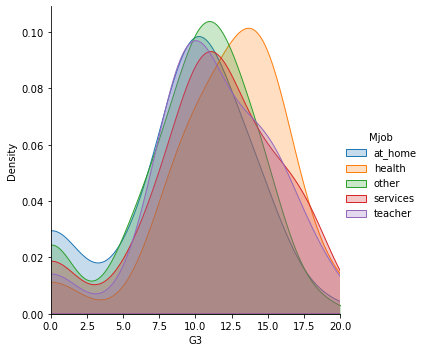

In [52]:
(sns
 .FacetGrid(df,
            hue = "Mjob",
            height = 5,
            xlim = (0,20))
 .map(sns.kdeplot, "G3", shade = True)
 .add_legend()
);

### VERİ SETİNİN DÜZENLENMESİ

In [53]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


In [54]:
grades_pass_fail = []
for index, row in df.iterrows():
    if row['G3'] >= 10:
        grades_pass_fail.append(1) #geçti
    else:
        grades_pass_fail.append(0) #kaldı
        
grades_pass_fail_series = pd.Series(grades_pass_fail)
df["Gecti_Kaldi"] = grades_pass_fail_series
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Gecti_Kaldi
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,1


In [55]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Gecti_Kaldi
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,1


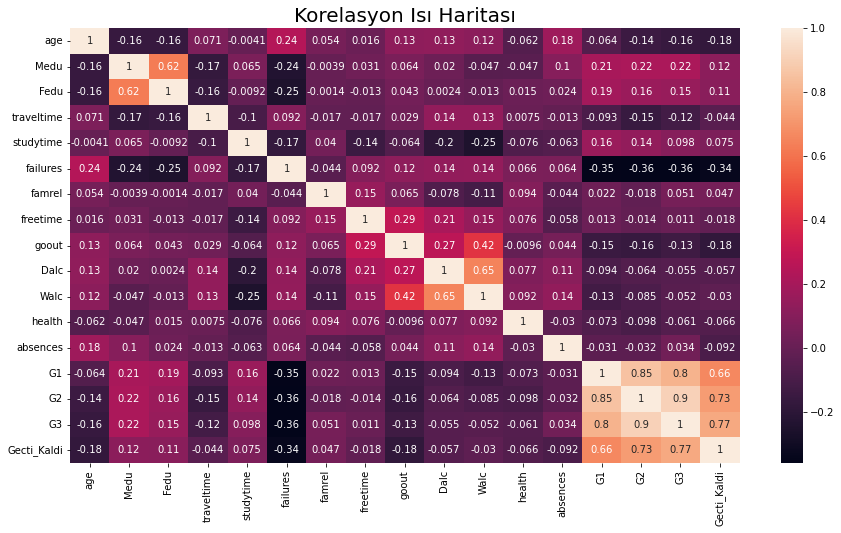

In [56]:

plt.figure(figsize=(15,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True)
plt.title('Korelasyon Isı Haritası', fontsize = 20);

In [57]:
from sklearn.metrics import mutual_info_score

In [58]:
categorical_variables = math.select_dtypes(include = object)

In [59]:
categorical_variables

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,other,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,other,no,no,no,no,no,yes,no,no
393,MS,M,R,LE3,T,services,other,course,mother,no,no,no,no,no,yes,yes,no


In [60]:

def compute_mutual_information(categorical_serie):
    return mutual_info_score(categorical_serie, math.G3)

feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending = False)
print(feature_importance)

Mjob          0.112001
Fjob          0.094754
reason        0.068820
schoolsup     0.046234
romantic      0.042337
paid          0.040313
guardian      0.037961
higher        0.035951
address       0.031603
sex           0.027669
internet      0.027266
nursery       0.023622
famsize       0.022291
activities    0.020910
Pstatus       0.020165
famsup        0.019123
school        0.017209
dtype: float64


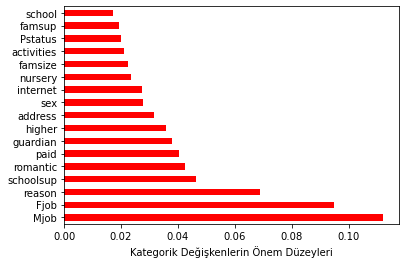

In [61]:
def compute_mutual_information(categorical_serie):
    return mutual_info_score(categorical_serie, math.G3)

categorical_variables = math.select_dtypes(include = object)
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending = False).plot(kind ="barh", color = "r")
plt.xlabel("Kategorik Değişkenlerin Önem Düzeyleri");

In [62]:
def compute_mutual_information(numerical_serie):
    return mutual_info_score(numerical_serie, math.G3)

numerical_variables = math.select_dtypes(include = int).drop("G3", axis = 1)
feature_importance = numerical_variables.apply(compute_mutual_information).sort_values(ascending = False)
print(feature_importance)

G2            1.422767
G1            0.914258
absences      0.578319
failures      0.150042
age           0.113711
Walc          0.110130
Medu          0.097282
goout         0.096442
Dalc          0.095026
health        0.085802
Fedu          0.083045
freetime      0.077598
studytime     0.073679
famrel        0.071252
traveltime    0.049843
dtype: float64


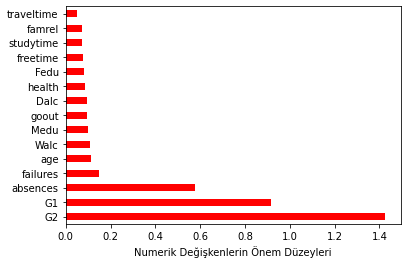

In [63]:
def compute_mutual_information(numerical_serie):
    return mutual_info_score(numerical_serie, math.G3)

numerical_variables = math.select_dtypes(include = int).drop("G3", axis = 1)
feature_importance = numerical_variables.apply(compute_mutual_information).sort_values(ascending = False).plot(kind ="barh", color = "r")
plt.xlabel("Numerik Değişkenlerin Önem Düzeyleri");

C:\Users\Erkut\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


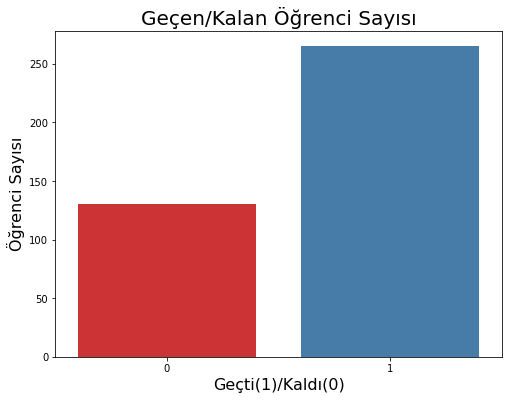

In [64]:
# G3 Countplot
plt.figure(figsize=(8,6))
sns.countplot(df.Gecti_Kaldi, palette='Set1')
plt.title('Geçen/Kalan Öğrenci Sayısı',fontsize=20)
plt.xlabel('Geçti(1)/Kaldı(0)', fontsize=16)
plt.ylabel('Öğrenci Sayısı', fontsize=16);
#Öğrencilerin çoğu geçmiş

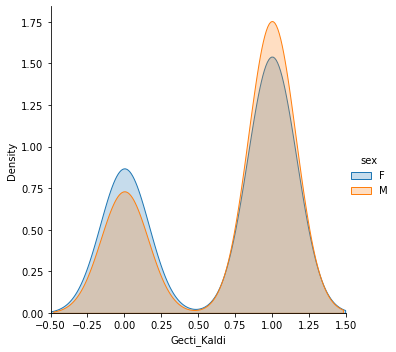

In [65]:
(sns
 .FacetGrid(df,
            hue = "sex",
            height = 5,
            xlim = (-0.5,1.5))
 .map(sns.kdeplot, "Gecti_Kaldi", shade = True)
 .add_legend()
);

In [66]:
import warnings
warnings.filterwarnings("ignore")

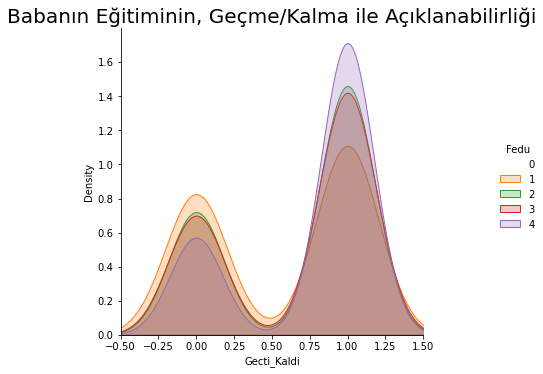

In [67]:
(sns
 .FacetGrid(df,
            hue = "Fedu",
            height = 5,
            xlim = (-0.5,1.5))
 .map(sns.kdeplot, "Gecti_Kaldi", shade = True)
 .add_legend()
);
plt.title('Babanın Eğitiminin, Geçme/Kalma ile Açıklanabilirliği', fontsize = 20);
#Babanın eğitim seviyesi yüksek olan öğrenciler başarısal olarak daha yüksek geçme oranına sahipler.

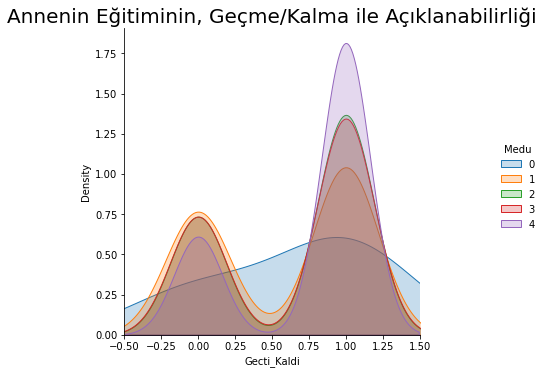

In [68]:
(sns
 .FacetGrid(df,
            hue = "Medu",
            height = 5,
            xlim = (-0.5,1.5))
 .map(sns.kdeplot, "Gecti_Kaldi", shade = True)
 .add_legend()
);
plt.title('Annenin Eğitiminin, Geçme/Kalma ile Açıklanabilirliği', fontsize = 20);
#Annenin eğitim seviyesi yüksek olan öğrenciler başarısal olarak daha yüksek geçme oranına sahipler.

In [69]:
import statsmodels.api as sm

In [70]:
# doğrusal olarak katsayılara bakalım
X_edu = df[['Medu','Fedu']]
y_edu = df.Gecti_Kaldi
edu = sm.OLS(y_edu, X_edu)
results_edu = edu.fit()
results_edu.summary()
#Annenin etkisi babanın etkisinden fazla

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Gecti_Kaldi   R-squared (uncentered):                   0.628
Model:                            OLS   Adj. R-squared (uncentered):              0.626
Method:                 Least Squares   F-statistic:                              332.1
Date:                Sat, 01 Jan 2022   Prob (F-statistic):                    3.49e-85
Time:                        17:41:21   Log-Likelihood:                         -286.19
No. Observations:                 395   AIC:                                      576.4
Df Residuals:                     393   BIC:                                      584.3
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Medu           0.1333      0.026      5.142      0.000       0.082       0.184
Fedu           0.0961      0.028      3.439      0.001       0.041       0.151
==============================================================================
Omnibus:                       66.869   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.658
Skew:                          -0.506   Prob(JB):                     2.20e-07
Kurtosis:                       2.084   Cond. No.                         5.94
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

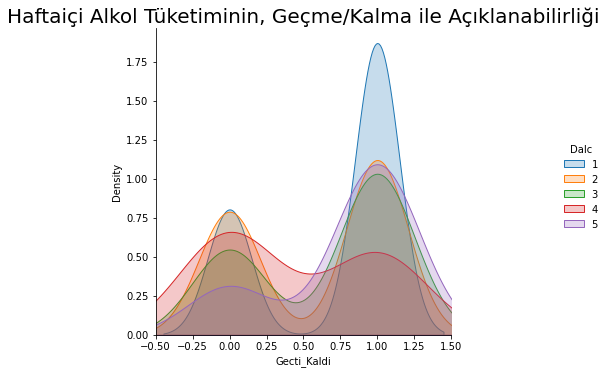

In [71]:
(sns
 .FacetGrid(df,
            hue = "Dalc",
            height = 5,
            xlim = (-0.5,1.5))
 .map(sns.kdeplot, "Gecti_Kaldi", shade = True)
 .add_legend()
);
plt.title('Haftaiçi Alkol Tüketiminin, Geçme/Kalma ile Açıklanabilirliği', fontsize = 20);
#Haftaiçi alkol tüketimi az olan öğrenciler başarısal olarak daha yüksek geçme oranına sahipler.

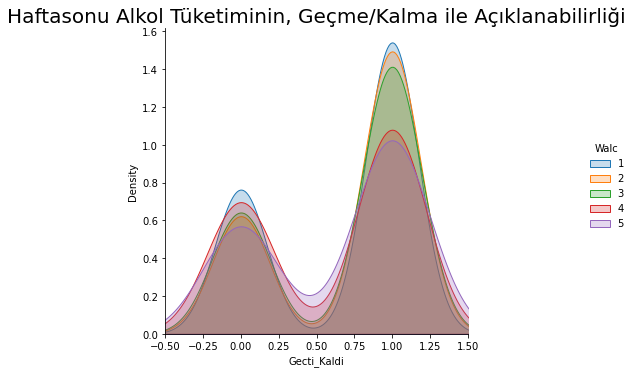

In [72]:
(sns
 .FacetGrid(df,
            hue = "Walc",
            height = 5,
            xlim = (-0.5,1.5))
 .map(sns.kdeplot, "Gecti_Kaldi", shade = True)
 .add_legend()
);
plt.title('Haftasonu Alkol Tüketiminin, Geçme/Kalma ile Açıklanabilirliği', fontsize = 20);
#Haftasonu alkol tüketimi az olan öğrenciler başarısal olarak daha yüksek geçme oranına sahipler.

In [74]:
# doğrusal olarak katsayılara bakalım
X_edu = df[['Dalc','Walc']]
y_edu = df.Gecti_Kaldi
edu = sm.OLS(y_edu, X_edu)
results_edu = edu.fit()
results_edu.summary()
#Haftasonu alkol tüketiminin etkisi haftaiçi alkol tüketimi etkisinden fazla

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Gecti_Kaldi   R-squared (uncentered):                   0.509
Model:                            OLS   Adj. R-squared (uncentered):              0.506
Method:                 Least Squares   F-statistic:                              203.5
Date:                Sat, 01 Jan 2022   Prob (F-statistic):                    2.23e-61
Time:                        15:09:03   Log-Likelihood:                         -341.28
No. Observations:                 395   AIC:                                      686.6
Df Residuals:                     393   BIC:                                      694.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Dalc           0.1179      0.041      2.904      0.004       0.038       0.198
Walc           0.1494      0.027      5.600      0.000       0.097       0.202
==============================================================================
Omnibus:                       55.487   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.222
Skew:                          -0.632   Prob(JB):                     8.27e-09
Kurtosis:                       2.184   Cond. No.                         5.08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

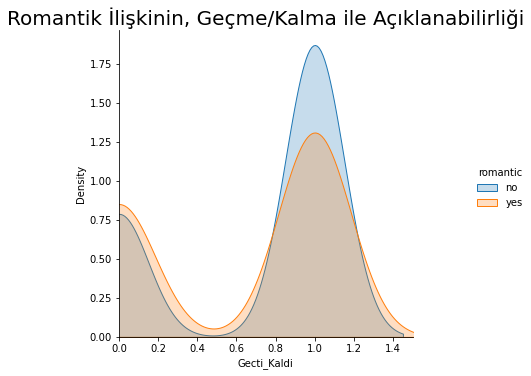

In [75]:
(sns
 .FacetGrid(df,
            hue = "romantic",
            height = 5,
            xlim = (0,1.5))
 .map(sns.kdeplot, "Gecti_Kaldi", shade = True)
 .add_legend()
);
plt.title('Romantik İlişkinin, Geçme/Kalma ile Açıklanabilirliği', fontsize = 20);
#Lisede romantik ilişki yaşayanlar, yaşamayanlara göre daha düşük notlar almıştır.

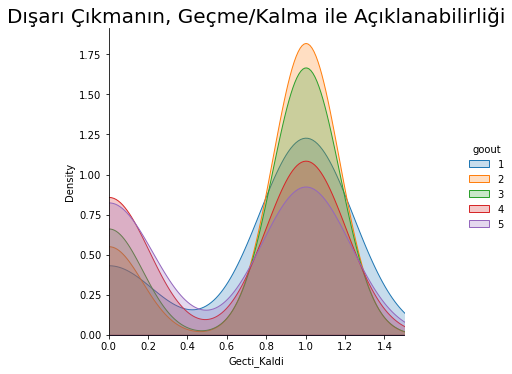

In [76]:
(sns
 .FacetGrid(df,
            hue = "goout",
            height = 5,
            xlim = (0,1.5))
 .map(sns.kdeplot, "Gecti_Kaldi", shade = True)
 .add_legend()
);
plt.title('Dışarı Çıkmanın, Geçme/Kalma ile Açıklanabilirliği', fontsize = 20);
#Çok fazla dışarı çıkanlar düşük geçme oranına sahiptir fakat 2 dereceli çıkanlar en yüksek geçme oranına sahiptir.
#Bu yüzden ilişkinin anlamlılığı incelenmelidir.

In [77]:
#Ki-Kare Testi 
out_tab = pd.crosstab(index=df.Gecti_Kaldi, columns=df.goout)
out_table = sm.stats.Table(out_tab)
out_rslt = out_table.test_nominal_association()
out_rslt.pvalue
#P değeri 0.05den küçük o yüzden anlamlıdır ve bir ilişki var denilebilir.

0.0033132256042557318

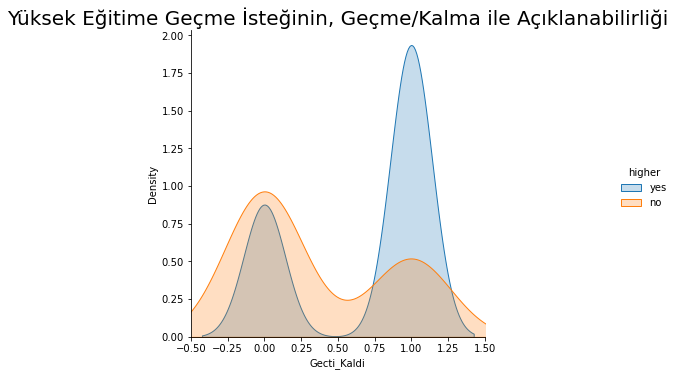

In [73]:
(sns
 .FacetGrid(df,
            hue = "higher",
            height = 5,
            xlim = (-0.5,1.5))
 .map(sns.kdeplot, "Gecti_Kaldi", shade = True)
 .add_legend()
);
plt.title('Yüksek Eğitime Geçme İsteğinin, Geçme/Kalma ile Açıklanabilirliği', fontsize = 20);
#Yüksek eğitime geçme isteği olan öğrencilerin geçme oranı daha yüksektir.

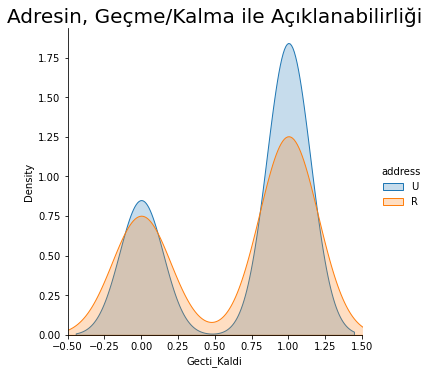

In [74]:
(sns
 .FacetGrid(df,
            hue = "address",
            height = 5,
            xlim = (-0.5,1.5))
 .map(sns.kdeplot, "Gecti_Kaldi", shade = True)
 .add_legend()
);
plt.title('Adresin, Geçme/Kalma ile Açıklanabilirliği', fontsize = 20);
#Şehir içinde yaşayan öğrencilerin derslerden geçme oranı daha yüksektir.

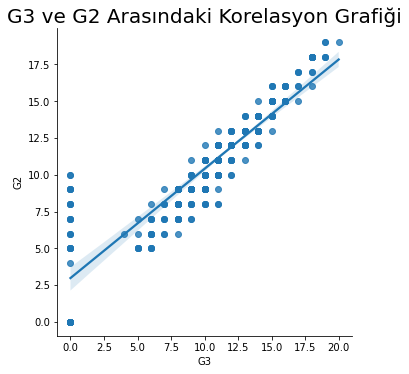

In [80]:
sns.lmplot(x = "G3", y = "G2", data = df)
plt.title('G3 ve G2 Arasındaki Korelasyon Grafiği', fontsize = 20);

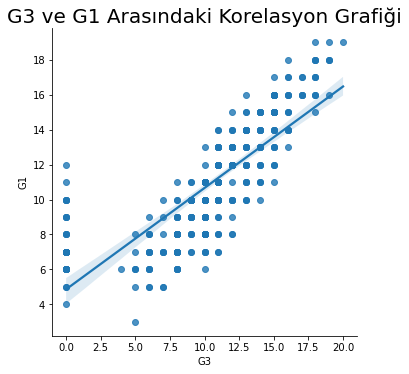

In [81]:
sns.lmplot(x = "G3", y = "G1", data = df)
plt.title('G3 ve G1 Arasındaki Korelasyon Grafiği', fontsize = 20);

In [75]:
# doğrusal olarak katsayılara bakalım
X_edu = df[['G1','G2']]
y_edu = math.G3
edu = sm.OLS(y_edu, X_edu)
results_edu = edu.fit()
results_edu.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     G3   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              6151.
Date:                Sat, 01 Jan 2022   Prob (F-statistic):                   2.71e-297
Time:                        18:23:06   Log-Likelihood:                         -834.58
No. Observations:                 395   AIC:                                      1673.
Df Residuals:                     393   BIC:                                      1681.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
G1             0.0067      0.051      0.132      0.895      -0.094       0.107
G2             0.9797      0.051     19.084      0.000       0.879       1.081
==============================================================================
Omnibus:                      261.432   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1976.762
Skew:                          -2.899   Prob(JB):                         0.00
Kurtosis:                      12.299   Cond. No.                         11.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Veri Ön İşleme

In [77]:
binary_cat_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup',
                      'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
                      'romantic']
#school GP = 0 , sex Female = 0, adress urban = 0, famsize GT3 = 0, Pstatus  Apart = 0, schoolup yes = 1, famsup no = 0, paid no = 0, activities no = 0, nursery yes = 1, higher yes = 1,
#internet no = 0, romantic no = 0

In [78]:
from sklearn.preprocessing import LabelEncoder

In [79]:
lbe = LabelEncoder()

In [80]:
for col in binary_cat_columns:
    df[col] = lbe.fit_transform(df[col])
    

In [81]:
df.head().T

,0,1,2,3,4
school,0,0,0,0,0
sex,0,0,0,0,0
age,18,17,15,15,16
address,1,1,1,1,1
famsize,0,0,1,0,0
Pstatus,0,1,1,1,1
Medu,4,1,1,4,3
Fedu,4,1,1,2,3
Mjob,at_home,at_home,at_home,health,other
Fjob,teacher,other,other,services,other


In [82]:
nominal_cat_columns = ['Mjob', 'Fjob', 'reason', 'guardian']

In [83]:
for col in nominal_cat_columns:
    df = pd.get_dummies(df, columns=[col], drop_first=True)

In [84]:
df.head().T

,0,1,2,3,4
school,0,0,0,0,0
sex,0,0,0,0,0
age,18,17,15,15,16
address,1,1,1,1,1
famsize,0,0,1,0,0
Pstatus,0,1,1,1,1
Medu,4,1,1,4,3
Fedu,4,1,1,2,3
traveltime,2,1,1,1,1
studytime,2,2,2,3,2


In [85]:
df.drop("G3", axis = 1, inplace = True)

In [86]:
df.head().T

,0,1,2,3,4
school,0,0,0,0,0
sex,0,0,0,0,0
age,18,17,15,15,16
address,1,1,1,1,1
famsize,0,0,1,0,0
Pstatus,0,1,1,1,1
Medu,4,1,1,4,3
Fedu,4,1,1,2,3
traveltime,2,1,1,1,1
studytime,2,2,2,3,2


In [99]:
df.to_csv("C:/Users/Erkut/Desktop/Güncel Python Projeleri/math_performanced.csv" , index = False)

### VERİ SETİ HAZIRLIĞI ve GBM UYGULAMASI

In [87]:
y = df["Gecti_Kaldi"]
X = df.drop(['Gecti_Kaldi'], axis = 1)
X = pd.DataFrame(X)


In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [90]:
from sklearn.ensemble import GradientBoostingClassifier

In [91]:
from sklearn.metrics import accuracy_score

In [92]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [93]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8823529411764706

### MODEL TUNİNG

In [94]:
gbm_params = {'max_depth': [2, 3, 4, 5, 9, 10, 15, 20, 25, 35],
          'min_samples_leaf': [1, 3, 2, 4, 5],
          'min_samples_split': [2, 3, 4, 5, 10]}

In [95]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [96]:
gbm = GradientBoostingClassifier()

In [97]:
gbm_rand = GridSearchCV(gbm, gbm_params, cv = 10, scoring = 'accuracy',
                          n_jobs = 1, verbose = 10)

In [98]:
gbm_rand.fit(X_train, y_train)

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
[CV 1/10; 1/250] START max_depth=2, min_samples_leaf=1, min_samples_split=2.....
[CV 1/10; 1/250] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=1.000 total time=   0.0s
[CV 2/10; 1/250] START max_depth=2, min_samples_leaf=1, min_samples_split=2.....
[CV 2/10; 1/250] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.929 total time=   0.0s
[CV 3/10; 1/250] START max_depth=2, min_samples_leaf=1, min_samples_split=2.....
[CV 3/10; 1/250] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.964 total time=   0.0s
[CV 4/10; 1/250] START max_depth=2, min_samples_leaf=1, min_samples_split=2.....
[CV 4/10; 1/250] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.857 total time=   0.0s
[CV 5/10; 1/250] START max_depth=2, min_samples_leaf=1, min_samples_split=2.....
[CV 5/10; 1/250] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.964 total time=   

KeyboardInterrupt: 

In [ ]:
print("En iyi parametreler: " + str(gbm_rand.best_params_))

In [ ]:
gbm = GradientBoostingClassifier(min_samples_split = 5,
                                 min_samples_leaf = 1,
                                max_depth = 4)

In [ ]:
gbm_tuned =  gbm.fit(X_train,y_train)

In [ ]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

### XGBoost Uygulaması

In [ ]:
y = df["Gecti_Kaldi"]
X = df.drop(['Gecti_Kaldi'], axis = 1)
X = pd.DataFrame(X)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False).fit(X_train, y_train)

In [ ]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

### MODEL TUNİNG

In [ ]:
 xgb_params = {
        'max_depth': [2, 3, 4, 5, 9, 10, 15, 20, 25, 35],
        'n_estimators': [50, 70, 100, 150, 200, 250, 500],
        'gamma': [0.5, 1, 1.5, 2, 5]}

In [ ]:
xgb = XGBClassifier(use_label_encoder=False)

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = 1, verbose = 2)

In [ ]:
xgb_cv_model.fit(X_train, y_train)

In [ ]:
xgb_cv_model.best_params_

In [ ]:
xgb = XGBClassifier(max_depth = 3, 
                    gamma = 5,
                    n_estimators = 50,)

In [ ]:
xgb_tuned =  xgb.fit(X_train,y_train)

In [ ]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

### LIGHT GBM

In [ ]:
y = df["Gecti_Kaldi"]
X = df.drop(['Gecti_Kaldi'], axis = 1)
X = pd.DataFrame(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [ ]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

### MODEL TUNING

In [ ]:
lgbm_params = {
        'n_estimators': [50, 70, 100, 150, 200, 250, 500],
        'max_depth': [2, 3, 4, 5, 9, 10, 15, 20, 25, 35],
        'num_leaves': [2, 4, 6, 8, 10, 16, 32],
        "learning_rate": [0.01, 0.05, 0.1, 0.5, 1]}

In [ ]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
                             cv = 10, 
                             n_jobs = 1, 
                             verbose = 10)


In [ ]:
lgbm_cv_model.fit(X_train, y_train)

In [ ]:
lgbm_cv_model.best_params_

In [ ]:
gbm = LGBMClassifier( num_leaves = 4,
                       max_depth = 3,
                       n_estimators = 150,
                       learning_rate = 0.01)

In [ ]:
lgbm_tuned = lgbm.fit(X_train,y_train)

In [ ]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

### HANGİ MODEL META CLASSIFIER OLMALI

In [ ]:
modeller = [
    gbm_tuned,
    lgbm_tuned,
    xgb_tuned
    
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

In [ ]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');    

### XGBOOST YA DA LIGH GBM META CLASSIFIER OLMALI MAKALEDE SEÇILDIĞI UZERE XGBOOST TERCIH EDILIR

### SUPER LEARNER UYGULAMASI

In [ ]:
!pip install mlxtend

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

In [ ]:
from mlxtend.classifier import StackingCVClassifier

In [ ]:
y = df["Gecti_Kaldi"]
X = df.drop(['Gecti_Kaldi'], axis = 1)
X = pd.DataFrame(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [ ]:
classifier1 = GradientBoostingClassifier(min_samples_split = 5,
                                 min_samples_leaf = 1,
                                max_depth = 4)

In [ ]:
classifier2 = XGBClassifier(max_depth = 3, 
                    gamma = 5,
                    n_estimators = 50,)

In [ ]:
classifier3 = LGBMClassifier( num_leaves = 4,
                       max_depth = 3,
                       n_estimators = 150,
                       learning_rate = 0.01)

In [ ]:
sclf = StackingCVClassifier(classifiers = [classifier2,classifier3],
                            shuffle = False,
                            use_probas = True,
                            cv = 10,
                            meta_classifier =classifier2)

In [ ]:
sclf.fit(X_train,y_train)

In [ ]:
y_pred = sclf.predict(X_test)

In [ ]:
sclf_conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
sclf_acc_score = accuracy_score(y_test, y_pred)

In [ ]:
print("confussion matrix")
print(sclf_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",sclf_acc_score*100,'\n')
print(classification_report(y_test,y_pred))

In [ ]:
params = {"meta_classifier__max_depth": [3, 4, 5,6],
          "meta_classifier__learning_rate": [0.1,0.01,0.02,0.05],
          "meta_classifier__min_samples_split": [2,5,10],
          "meta_classifier__subsample": [0.6, 0.8, 1.0],
         "meta_classifier__n_estimators": [100, 500, 1000, 2000]}

In [ ]:
grid = GridSearchCV(estimator = sclf, 
                    param_grid = params, 
                    cv = 10,
                    scoring = "accuracy",
                    verbose = 10,
                    n_jobs = 1)

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
y_pred = grid.predict(X_test)

In [ ]:
grid_acc_score = accuracy_score(y_test, y_pred)

In [ ]:
print(classification_report(y_test,y_pred))